In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from arch import arch_model


# Simulación

In [145]:
np.random.seed(11)

In [138]:
sim_mod = arch_model(None, p=2, o=0, q=2)
params = {"mu":0,"omega": 0.4,"alpha[1]":0.1,"alpha[2]":0.3,"beta[1]":0.3,"beta[2]":0.2}
param = pd.Series(params)

n=10000


In [139]:
datos_simulados = []
for i in range(n):
    sim_data = sim_mod.simulate(param, 1000)
    datos_simulados.append(sim_data["data"])


# PACF y ACF

# Ajuste

In [140]:
columns = ["mu","omega","alpha1","alpha2","beta1","beta2"]
parametros = pd.DataFrame(columns=columns)
parametros
for i in range(n):
    modelo = arch_model(datos_simulados[i], p=2, o=0, q=2)
    res = modelo.fit(disp="off")
    new_row = pd.DataFrame([res.params.values], columns=columns)
    parametros = pd.concat([parametros,new_row], axis=0)
    
    

In [141]:
parametros.head()

,mu,omega,alpha1,alpha2,beta1,beta2
0,0.005711,0.776270,0.140155,0.217371,0.192118,0.214841
0,0.028325,0.350218,0.064554,0.236597,0.551845,0.047019
0,0.032936,0.276303,0.063549,0.158756,0.656424,0.038110
0,0.007411,0.416909,0.078722,0.359592,0.270109,0.207101
0,-0.013212,0.405133,0.125251,0.189995,0.322150,0.204115


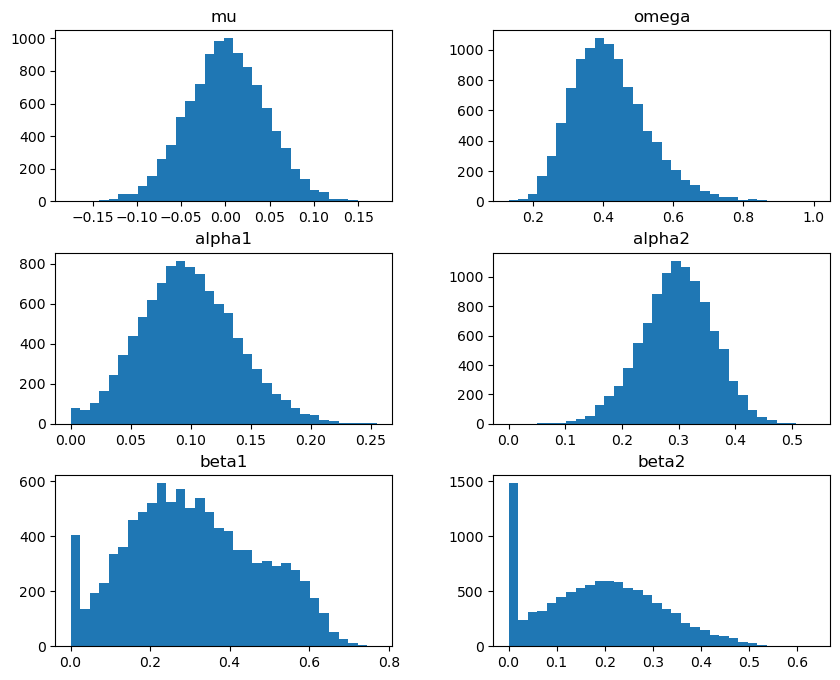

In [142]:
parametros.hist(figsize=(10, 8), grid = False,bins=32);

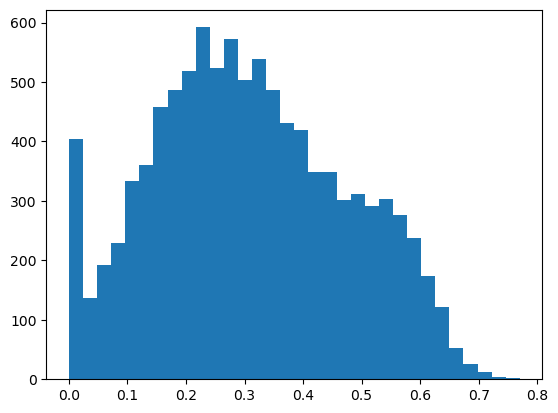

In [143]:
plt.hist(parametros["beta1"],bins=32);